## <span style="color:blue">PART 5: DATA VISUALIZATION</span>
In this section, we will plot heatmaps to show the distribution of sales volume around the King County, as well the zipcode locations of with the top 10 mean sale prices.

We will also create 3D scatter plots of different combinations of the 5 predictors variables that are most correlated with price, to visualize their relationship with price.

### <span style="color:blue">5.1 HEATMAPS OF SALES DISTRIBUTION AND MEAN PRICE DISTRIBUTION IN KING COUNTY</span>

In [62]:
# Create a heatmap of count of house sales by zip code
# Import the relevant libraries
import folium
from folium import plugins
from IPython.display import IFrame

# Create a dataframe for zipcode, latitude, longitude, and count of sales
zipcode_pivot = housing_data.pivot_table(index='zipcode', values=['lat', 'long', 'id'], 
                                         aggfunc={'lat': 'first', 'long': 'first', 
                                                  'id': 'count'}).reset_index()
zipcode_pivot = zipcode_pivot.sort_values(by='id', ascending=False).reset_index(drop=True)

# Create a base map
base_map = folium.Map(location=[zipcode_pivot['lat'].mean(), 
                                zipcode_pivot['long'].mean()], zoom_start=9)

# Create a list of latitude and longitude pairs
heat_data = [[row['lat'], row['long']] for index, row in zipcode_pivot.iterrows()]

# Create and add location markers and pop-up text for top 10 in count of sales
count = 0  # Initialize a counter
for index, row in zipcode_pivot.iterrows():
    popup_text = """Zip Code: {}, Latitude: {:.6f}, Longitude: {:.6f}, 
                Top {} in Sales = {} houses""".format(int(row['zipcode']), row['lat'],
                                                   row['long'], index + 1, row['id'].astype(int))
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker(location=[row['lat'], row['long']], popup=popup)
    marker.add_to(base_map)
    count += 1
    
    if count == 20:
        break

# Create a Heatmap layer
folium.plugins.HeatMap(heat_data).add_to(base_map)

# Save the map as an HTML file
base_map.save('heatmap_count_of_sales.html')

# Display the map in a Jupyter Notebook
IFrame('heatmap_count_of_sales.html', width=1000, height=400)

<img src="Images_folder/Heatmap for the Distribution of Top House Sale Volumes in King County.png" width=800>

In [63]:
# Create a heatmap of mean sale price by lat/long location 

# Create a dataframe for location, zipcode, and mean sale price
location = housing_data.groupby(['lat', 'long', 'zipcode'])['price'].mean().sort_values(ascending=False)
location_df = pd.DataFrame(location)
location_df = location_df.reset_index(drop=False)
location_df = location_df.rename(columns = {'price':'mean_price'})

# Create a base map
base_map = folium.Map(location=[location_df['lat'].mean(), 
                                location_df['long'].mean()], zoom_start=9)

# Create a list of latitude and longitude pairs
heat_data = [[row['lat'], row['long']] for index, row in location_df.iterrows()]

# Create and add location markers and pop-up text for top 10 mean sale prices
count = 0  # Initialize a counter
for index, row in location_df.iterrows():
    popup_text = "Latitude: {:.6f}, Longitude: {:.6f}, Top {} Mean Sale Price ($) : {}".format(row['lat'],
                                                                                   row['long'],
                                                                                   index + 1,
                                                                                   row['mean_price'])
    popup_text2 = "Sales Count: {}". format
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker(location=[row['lat'], row['long']], popup=popup)
    marker.add_to(base_map)
    count += 1
    
    if count == 10:
        break

# Create a Heatmap layer
folium.plugins.HeatMap(heat_data).add_to(base_map)

# Save the map as an HTML file
base_map.save('heatmap_mean_sale_price.html')

# Display the map in a Jupyter Notebook
IFrame('heatmap_mean_sale_price.html', width=1000, height=400)

<img src="Images_folder/Heatmap for the Distribution of Top Mean House Sale Price in King County.png" width=800>

### <span style="color:blue">EXPLANATION OF THE HEATMAPS</span>
The heatmap showing the top 20 in count of sales shows that the north western region of Seattle has the most dense concentration of zipcodes with top 20 in sales volume.

The heatmap showing the locations with top 10 mean prices also reveals that all the top 10 mean sale prices came from the north western region of Seattle.

This trend is to be expected, since Seattle is the most populous and most advanced city in King County and in the Washington State in general. Therefore, the number of homes on sale, the demand for houses, and the ability to purchase more expensive homes is to be found in Seattle.

The whole of the eastern side of the county seems to have little activity in terms of house sales. But this is expected, going by the many conservancies, forests, and prairies along the eastern side. This means that it is sparsely populated.  

### <span style="color:blue">5.2 3D SCATTER PLOTS OF THE PREDICTOR VARIABLES WITH THE TOP 5 HIGHEST CORRELATION WITH PRICE</span> 

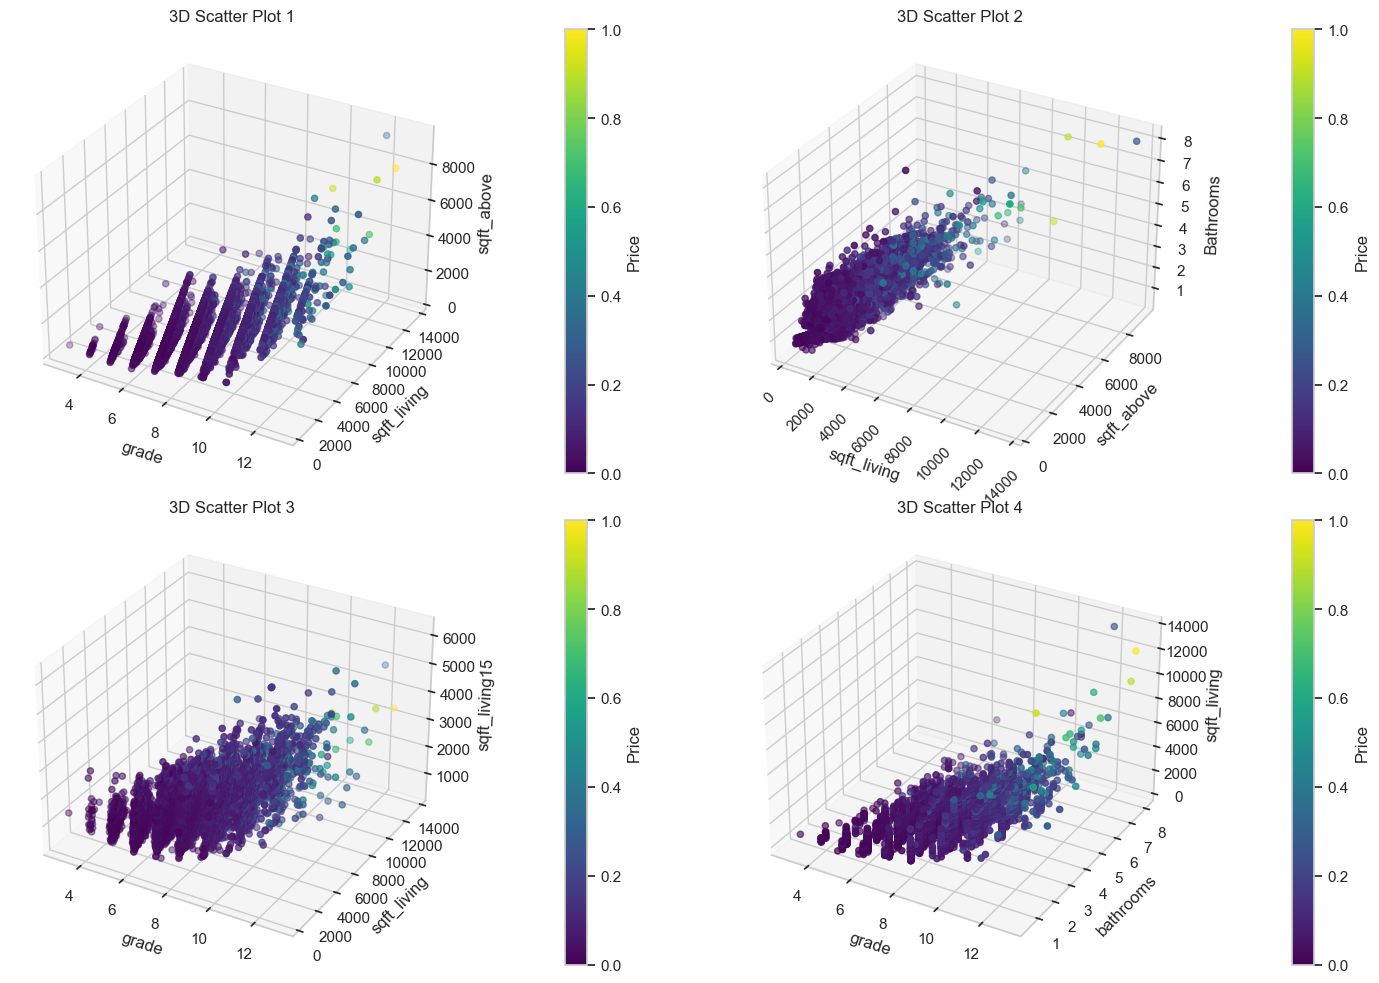

In [64]:
# Create a 2x2 grid of subplots for the four 3D scatter plots
fig = plt.figure(figsize=(15, 10))

# Define the variables 
sqft_living = housing_data['sqft_living']
grade = housing_data['grade']
sqft_above = housing_data['sqft_above']
sqft_living15 =  housing_data['sqft_living15']
bathrooms = housing_data['bathrooms']

price = housing_data['price']

# Scatter Plot 1 - grade, sqft_living, sqft_above with price as response variable
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(grade, sqft_living, sqft_above, c=price, cmap='viridis', marker='o')

# Set labels for scatter plot 1
ax1.set_xlabel('grade')
ax1.set_ylabel('sqft_living')
ax1.set_zlabel('sqft_above')
ax1.set_title('3D Scatter Plot 1')

# Colorbar for scatter plot 1
cbar1 = plt.colorbar(ax1.scatter([], [], [], c=[], cmap='viridis', marker='o'), ax=ax1, pad=0.15)
cbar1.set_label('Price')

# Scatter plot 2 - sqft_living, sqft_above, bathrooms with price as response variable
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(sqft_living, sqft_above, bathrooms, c=price, cmap='viridis', marker='o')

# Set labels for scatter plot 2
ax2.set_xlabel('sqft_living', labelpad=10)
ax2.w_xaxis.set_tick_params(rotation=45)
ax2.set_ylabel('sqft_above')
ax2.set_zlabel('Bathrooms')
ax2.set_title('3D Scatter Plot 2')

# Colorbar for scatter plot 2
cbar2 = plt.colorbar(ax2.scatter([], [], [], c=[], cmap='viridis', marker='o'), ax=ax2, pad=0.15)
cbar2.set_label('Price')

# Scatter Plot 3 - grade, sqft_living, sqft_living15 with price as response variable
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(grade, sqft_living, sqft_living15, c=price, cmap='viridis', marker='o')

# Set labels for scatter plot 3
ax3.set_xlabel('grade')
ax3.set_ylabel('sqft_living')
ax3.set_zlabel('sqft_living15')
ax3.set_title('3D Scatter Plot 3')

# Colorbar for scatter plot 3
cbar3 = plt.colorbar(ax3.scatter([], [], [], c=[], cmap='viridis', marker='o'), ax=ax3, pad=0.15)
cbar3.set_label('Price')

# Scatter Plot 4 - grade, bathrooms, sqft_living with price as response variable
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(grade, bathrooms, sqft_living, c=price, cmap='viridis', marker='o')

# Set labels for scatter plot 4
ax4.set_xlabel('grade')
ax4.set_ylabel('bathrooms')
ax4.set_zlabel('sqft_living')
ax4.set_title('3D Scatter Plot 4')

# Colorbar for scatter plot 4
cbar4 = plt.colorbar(ax4.scatter([], [], [], c=[], cmap='viridis', marker='o'), ax=ax4, pad=0.15)
cbar4.set_label('Price')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

### <span style="color:blue">EXPLANATION OF THE 3D SCATTER PLOTS</span>
3D scatter plot 1 shows that at different grades, the sale price increases with an increase in both sqft_living and sqft_above. 
However, the count of sales is denser between grade 6 and 8, and at the lower levels of both sqft_living and sqft_above.

3D scatter plot 2 shows that the sale price increases with an increase in sqft_living, sqft_above, and number of bathrooms. However, the count of sales is denser at the lower levels of all the three variables.

3D scatter plot 3 shows that different grades, the sale price increases with an increase in both sqft_living and sqft_living15. 
However, the count of sales is denser between grade 5 and 8, and at the lower levels of both sqft_living and sqft_living15.

3D scatter plot 4 shows that different grades, the sale price increases with an increase in both the number of bathrooms and sqft_living. However, the count of sales is denser between grade 6 and 8, and also between 3 and 5 bedrooms at the lower levels of sqft_living.

---
## <span style="color:blue">CONCLUSION</span>
---
**`The Set of Variables with the Highest Effect on Sales and Mean Sale Price`**

From our regression modelling, we found out that the five influential factors affecting house sale volume and mean sale price are:<br>

i.) The size of the interior living area in square feet<br>
ii.) The grade of the house, which is a classification by construction quality<br>
iii.) The square footage of the house excluding the basement<br>
iv.) The average size of interior living space for the closest 15 houses, in square feet<br>
v.) The number of bathrooms

**`Seasonal Variation of Sales Performance`**<br>

The northwestern States are characterized by sub-zero degree Winter months, which leads to more people willing to sell their houses so that they can move to warmer regions in the south. There are also fewer potential buyers during the colder months. 

Our analysis reveals that there is a variation in the volume of sales across the months in year.<br>

i.) January and February starts off the year with low sales of around 1,000 houses per month.<br>
ii.) The volume starts to rise in March, where it is about 1,500 houses.<br>
iii.) From April to July, the volume is about 2,000 houses per month.<br>
iv.) May has the highest volume at above 2,000 houses.<br>
v.) The volume starts to decline to around 1,700 houses in August and 1,500 houses in September.<br>
vi.) There is a slight increase in October, but the price then drops through November and December.

This trend coincides with the seasons in the USA. Winter runs from December to Mid-March, and the Northwestern States being colder, people tend to move to warmer southern states or countries. 

Spring runs from mid-March to mid-June, while Summer runs from June to August. During this period, a significant number of people may move back to the northwestern states, thus raising the demand for houses. 

Finally, Fall, which runs from September to December, heralds the start of another cold season, at which people start moving out of the northwestern states.

The distribution of mean sale prices over the months in a year also shows that there are significant differences.<br>
i.) The months of January and February have lower mean prices of between \\$500,000 and \\$525,000.<br>
ii.) The mean price from March to August is around \\$550,000 or higher. April has the highest mean price of above \\$550,000.<br> 
iii.) The mean price drops slightly in August and September, rises slightly in October, and then drops again in November and December. 

**`Grade`**<br>

Grade is a classification by construction quality which refers to the types of materials used and the quality of workmanship.
It is regulated by the [King County Local government](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r), and therefore, this is an important factor to anyone looking to buy a house. 

Our analysis of sales volume by grade appears to follow a normal distribution with grade 7 having the peak sales volume of about 8,000 houses. The lower grades of 3, and 4, and the higher grades of 11 and 12 each have sales volumes around 100 or fewer.

Our analysis has also shown that there is a significant difference in mean sale price among different house grades. Between grade 3 and 8, the mean price is between \\$250,000 to \\$500,000. From grade 9 to 13, the mean sale price rises from around \\$600,000 to over \\$3,500,000.

**`Number of Bedrooms`**<br>

On all social media platforms and social environments, almost everyone wants to know the number of bedrooms when they're scouting for houses. We therefore saw the need to find out if there is a relationship between the number of bedrooms and sales perfomance.

Our analysis of the relationship between sales and number of bedrooms shows that buyers and sellers have two major factors to consider:<br>

i.) The sales volume, which follows a normal distribution with a peak volume of 8,000 houses at the median number of 3 bedrooms.<br>
ii.) The distribution of mean sale price by number of bedrooms, which shows that the peak mean price is \\$1,200,000 at 8 bedrooms. For houses with 3 bedrooms, the mean price is only \\$465,000.

**`Distribution of Sales and Mean Sale Prices by Location`**<br>

The heatmap showing the top 20 in count of sales shows that the north western region of Seattle has the most dense concentration of zipcodes with top 20 in sales volume.

The heatmap showing the locations with top 10 mean prices also reveals that all the top 10 mean sale prices came from the north western region of Seattle.

This trend is to be expected, since Seattle is the most populous and most advanced city in King County and in the Washington State in general. Therefore, the number of homes on sale, the demand for houses, and the ability to purchase more expensive homes is to be found in Seattle.

## <span style="color:blue">RECOMMENDATIONS TO TEAM HOWLETT REALTORS</span>
1. For a home buyer to realize the best value their home buyer and a seller or for Team Howlett Reators to fetch optimal returns, they should give higher consideration to these five factors:<br>
i.) The size of the interior living area in square feet<br>
ii.) The grade of the house, which is a classification by construction quality<br>
iii.) The square footage of the house excluding the basement<br>
iv.) The average size of interior living space for the closest 15 houses, in square feet<br>
v.) The number of bathrooms

2. We would advise a buyer to consider buying a house in the offpeak months of January, February, September, October, November, or December, since this is the period they're likely to get a significant discount.<br>
To a seller, we advise them to consider selling in the peak months from March to August, since this is the period when the demand is high and they're also likely to sell at a significant margin compared to the offpeak months.

3. There is a significant difference in mean sale price between different house grades. Therefore, if a buyer wants a low-budget house or around \\$500,000 or less, we would advise them to consider houses between grade 3 and 8. If they have the budget for a more expensive house above \\$500,000, we would advise them to go for between grade 9 and 13.<br>
For a seller wishing to fetch the highest price in the market, they should go for grade 13 houses. If they want to sell low-priced houses quickly, then they should sell houses with between grades 3 and 8.

4. If a buyer wants a low-budget house (between \\$300,000 and \\$700,000), we would advise them to consider houses with between 1 and 4 bedrooms. If they have the budget for a more expensive house above \\$800,000, we would advise them to go for between 5 and 10 bedrooms.<br>
For a seller wishing to fetch the highest price in the market, they should go for 8-bedroom houses. If they want to sell low-priced houses quickly, then they should sell houses with between 1 and 4 bedrooms.

5. If a buyer wants a wider variety of high-grade homes on sale, they should search in Seattle region. However, this is also the region with the highest mean sale price.<br>
Therefore, overall the highest real estate business is to be found in Seattle and the northwestern region of the King County in general.

## <span style="color:blue">STUDY LIMITATIONS</span>
1. Our best multiple linear regression model achieved an R-squared value of 0.546 and an overall p-value of 0.00. These metrics suffice for the present inferential modelling but are lower than the standard required for predictive modelling which would require at least an R-squared of 0.8.

2. We did not have data about the profitability per sale. Therefore, we could not ascertain whether the distribution of mean sale price or the sales volume correlates with profitability.<br>
Moreover, buildings of better quality (higher grade) cost more to build per unit of measure and therefore, it could be possible that their profitability is not as high as lower-grade houses.

3. We did not have data about proximity to amenities such as schools, transport infrastructure, and so on, and therefore, we could not determine how they would affect sales performance.

4. The data is not augmented with data about enabling factors such as the state of the economy in County and the interest rates.

## <span style="color:blue">RECOMMENDATIONS FOR FUTURE RESEARCH</span>

1. Future studies should get data about profitability of the house sales, so as to find out the relationship between sales performance and profitability. This would provde a real estate agency with more solid advice about sales performance.

2. Future studies should also find out proximity of amenities such as schools, and transport infrastructure. These could be confounding variables that could have skewed the sales performance. Also, the current report does not help a buyer to know if a house of their choice will afford them these proximity to these important amenities.

3. Augmenting the dataset with data about more enabling factors such as the state of the economy in County and the interest rates. This would enable a seller to know the best times to sell and when not to sell. It would also inform a buyer about the best times to buy or take up mortgage. 